## Analysing SSDF maps

### Import modules

In [5]:
import pylab as plt
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table, join
import seaborn as sns

from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
from astropy.io import fits
from astropy import wcs

from scipy import stats



### Define functions

In [49]:
# Utils
def read_cat_coord (instrument, field):
    file = '../dmu26_XID+' + instrument + '_' + field + '/data/dmu26_XID+' + instrument + '_' + field +'_cat.fits'
    cat=Table.read(file)
    return cat[['RA', 'Dec']]

def read_stack (field, band):
    stackfits = '../data/stacking/data/' + field + '_' + band + 'stack.fits'
    stack=fits.open(stackfits)[1].data
    stack_err=fits.open(stackfits)[2].data
    return stack, stack_err

def map_fitsfile (field, band):
    fitsfile='../../dmu19/dmu19_HELP-SPIRE-maps/data/'+ field + '_SPIRE' + band + '_v1.0.fits'#SPIRE map
    return fitsfile


def get_SPIRE_data (fitsfile):
    hdulist = fits.open(fitsfile)
    im  = hdulist[1].data # Jy/beam
    nim = hdulist[3].data # Jy/beam
    nim = nim**2
    cov = hdulist[4].data # seconds
    mask = cov >1
    hdulist.close()
    return im[mask], nim[mask], cov[mask]


def plot_images(files_list, figsize):
    plt.figure(figsize=figsize)
    for i, file in enumerate(files_list):
        plt.subplot(len(files_list)//2 + 1, len(files_list)//2 + 1, i+1)
        plt.imshow(file)

def norm_hist_b (x, label):
    weights = np.ones_like(x)/float(len(x))
    n_bins = np.sqrt(len(x))
    n_bins = int(n_bins)
    plt.hist(x, weights=weights, bins=n_bins, label=label, alpha=0.5)
    plt.legend()

def norm_hist (x, bins, label):
    weights = np.ones_like(x)/float(len(x))
    plt.hist(x, weights=weights, bins=bins, label=label, alpha=0.5)
    plt.legend()

def normalized (x):
    norm = (x-min(x))/(max(x)-min(x))
    return norm

def fit_linear (cov, nim):
    t_inv = 1/cov
    x = t_inv.flatten()
    y = nim.flatten()
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask],y[mask])
    return x, y, slope, intercept



### Read in files


#### CATALOGUES

In [72]:
catSSDF = read_cat_coord('SPIRE', 'SSDF')
catHDFN = read_cat_coord('SPIRE', 'HDF-N')
catNGP = read_cat_coord('SPIRE', 'NGP')
catE = read_cat_coord('SPIRE', 'ELAIS-N2')
catXMM = read_cat_coord('SPIRE', 'XMM-LSS_SWIREnSPUDS')

#### MAPS

In [8]:
# SSDF
pswSSDF = map_fitsfile('SSDF', '250')#SPIRE 250 map
pmwSSDF = map_fitsfile('SSDF', '350')#SPIRE 350 map
plwSSDF = map_fitsfile('SSDF', '500')#SPIRE 500 map

# HDF-N
pswHDFN = map_fitsfile('HDF-N', '250') #SPIRE 250 map
pmwHDFN = map_fitsfile('HDF-N', '350') #SPIRE 350 map
plwHDFN = map_fitsfile('HDF-N', '500') #SPIRE 500 map

# HATLAS - NGP
pswNGP = map_fitsfile('HATLAS-NGP', '250') #SPIRE 250 map
pmwNGP = map_fitsfile('HATLAS-NGP', '350') #SPIRE 350 map
plwNGP = map_fitsfile('HATLAS-NGP', '500') #SPIRE 500 map

# ELAIS-N2
pswEL = map_fitsfile('ELAIS-N2', '250') #SPIRE 250 map
pmwEL = map_fitsfile('ELAIS-N2', '350') #SPIRE 350 map
plwEL = map_fitsfile('ELAIS-N2', '500') #SPIRE 500 map


# XMM-LSS-SWIRE

pswXMM = map_fitsfile('XMM-LSS', '250') #SPIRE 250 map
pmwXMM = map_fitsfile('XMM-LSS', '350') #SPIRE 350 map
plwXMM = map_fitsfile('XMM-LSS', '500') #SPIRE 500 map



# STACKING

In [53]:
# Read in stack image

stack_SSDF250, stackE_SSDF250 = read_stack('SSDF', '250')
stack_SSDF350, stackE_SSDF350 = read_stack('SSDF', '350')
stack_SSDF500, stackE_SSDF500 = read_stack('SSDF', '500')

stack_NGP250, stackE_NGP250 = read_stack('NGP', '250')
stack_NGP350, stackE_NGP350 = read_stack('NGP', '350')
stack_NGP500, stackE_NGP500 = read_stack('NGP', '500')

stack_HDFN250, stackE_HDFN250 = read_stack('HDF-N', '250')
stack_HDFN350, stackE_HDFN350 = read_stack('HDF-N', '350')
stack_HDFN500, stackE_HDFN500 = read_stack('HDF-N', '500')

stack_EL250, stackE_EL250 = read_stack('ELAIS-N2', '250')
stack_EL350, stackE_EL350 = read_stack('ELAIS-N2', '350')
stack_EL500, stackE_EL500 = read_stack('ELAIS-N2', '500')



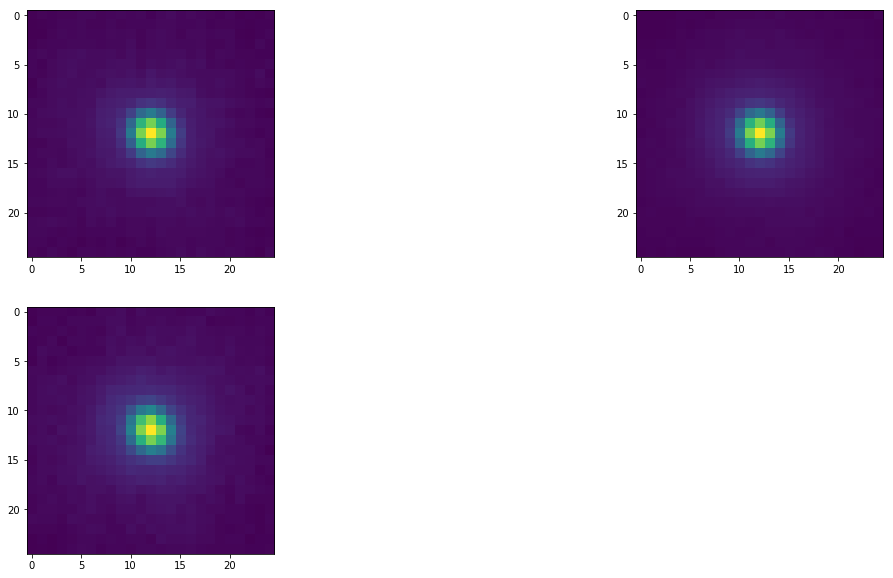

In [66]:
stack_list = [stack_SSDF250, stack_SSDF350, stack_SSDF500]
plot_images(stack_list, (20,10)) 

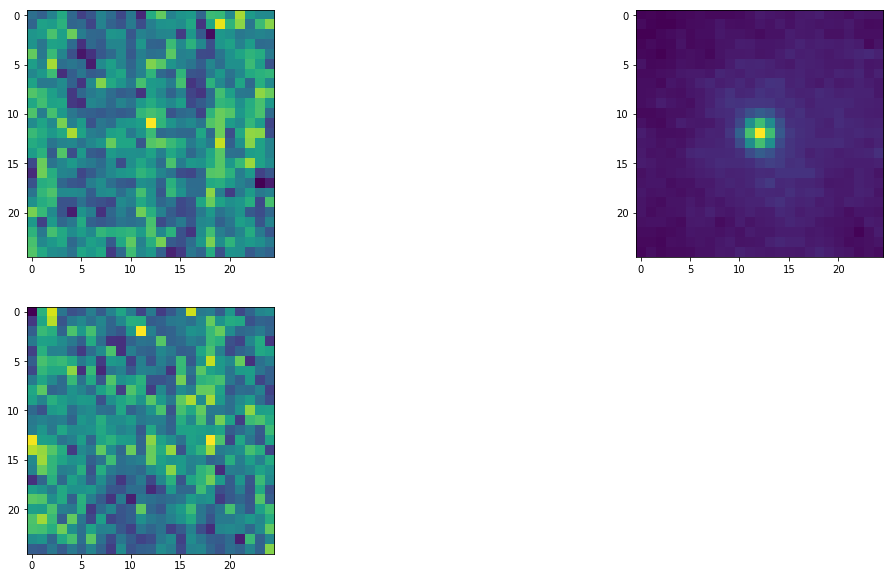

In [69]:
stackE_list = [stackE_SSDF250, stackE_SSDF350, stackE_SSDF500]
plot_images(stackE_list, (20,10))     
    


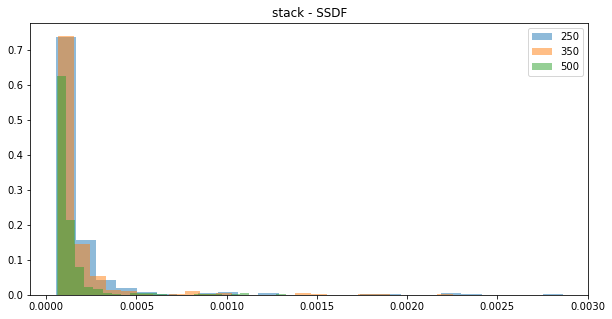

In [70]:
plt.figure(figsize=(10,5))
plt.title('stack - SSDF')
norm_hist_b(stack_SSDF250.flatten(), '250')
norm_hist_b(stack_SSDF350.flatten(), '350')
norm_hist_b(stack_SSDF500.flatten(), '500')

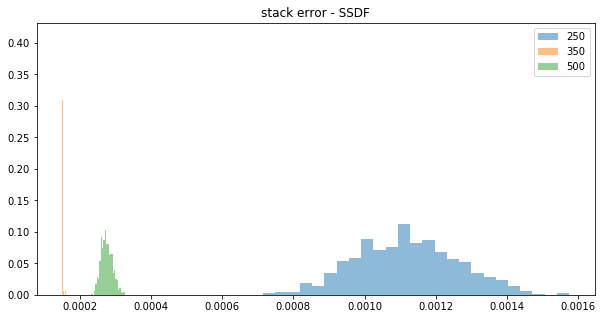

In [71]:
plt.figure(figsize=(10,5))
plt.title('stack error - SSDF')
norm_hist_b(stackE_SSDF250.flatten(), '250')
norm_hist_b(stackE_SSDF350.flatten(), '350')
norm_hist_b(stackE_SSDF500.flatten(), '500')


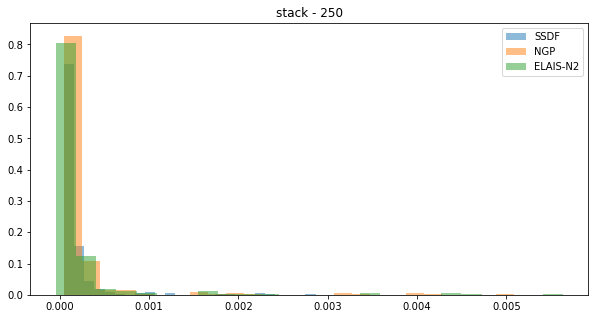

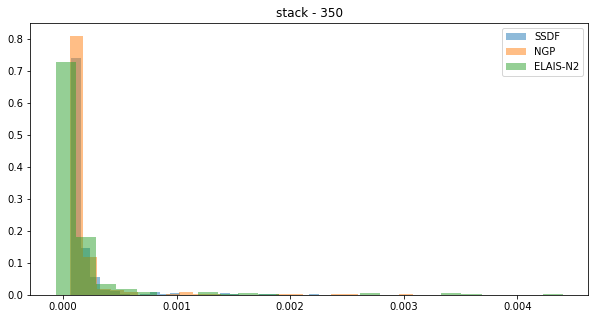

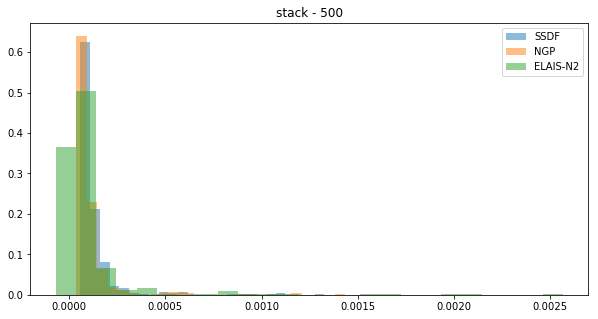

In [79]:
plt.figure(figsize=(10,5))
plt.title('stack - 250')
norm_hist_b(stack_SSDF250.flatten(), 'SSDF')
norm_hist_b(stack_NGP250.flatten(), 'NGP')
#norm_hist_b(stack_HDFN250.flatten(), 'HDFN')
norm_hist_b(stack_EL250.flatten(), 'ELAIS-N2')

plt.figure(figsize=(10,5))
plt.title('stack - 350')
norm_hist_b(stack_SSDF350.flatten(), 'SSDF')
norm_hist_b(stack_NGP350.flatten(), 'NGP')
#norm_hist_b(stack_HDFN350.flatten(), 'HDFN')
norm_hist_b(stack_EL350.flatten(), 'ELAIS-N2')

plt.figure(figsize=(10,5))
plt.title('stack - 500')
norm_hist_b(stack_SSDF500.flatten(), 'SSDF')
norm_hist_b(stack_NGP500.flatten(), 'NGP')
#norm_hist_b(stack_HDFN500.flatten(), 'HDFN')
norm_hist_b(stack_EL500.flatten(), 'ELAIS-N2')

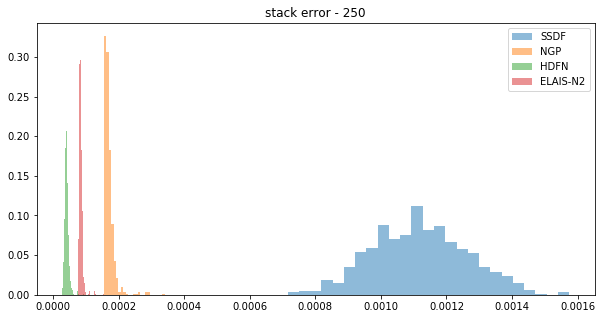

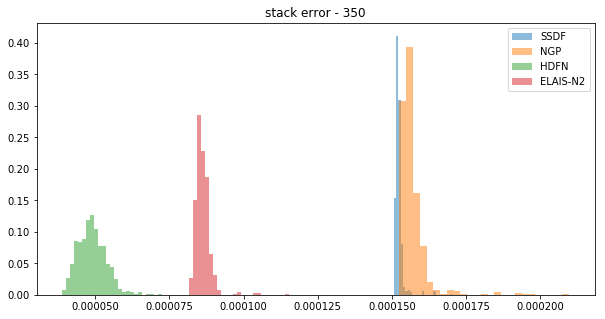

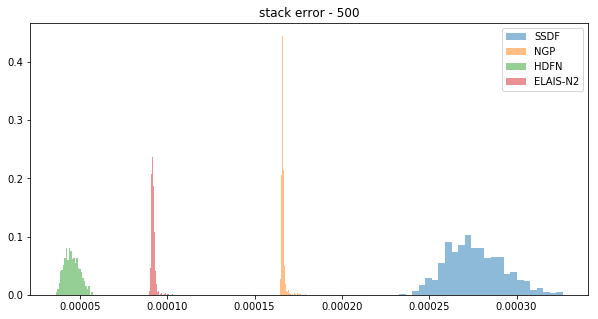

In [76]:
plt.figure(figsize=(10,5))
plt.title('stack error - 250')
norm_hist_b(stackE_SSDF250.flatten(), 'SSDF')
norm_hist_b(stackE_NGP250.flatten(), 'NGP')
norm_hist_b(stackE_HDFN250.flatten(), 'HDFN')
norm_hist_b(stackE_EL250.flatten(), 'ELAIS-N2')

plt.figure(figsize=(10,5))
plt.title('stack error - 350')
norm_hist_b(stackE_SSDF350.flatten(), 'SSDF')
norm_hist_b(stackE_NGP350.flatten(), 'NGP')
norm_hist_b(stackE_HDFN350.flatten(), 'HDFN')
norm_hist_b(stackE_EL350.flatten(), 'ELAIS-N2')

plt.figure(figsize=(10,5))
plt.title('stack error - 500')
norm_hist_b(stackE_SSDF500.flatten(), 'SSDF')
norm_hist_b(stackE_NGP500.flatten(), 'NGP')
norm_hist_b(stackE_HDFN500.flatten(), 'HDFN')
norm_hist_b(stackE_EL500.flatten(), 'ELAIS-N2')

In [28]:
print('SSDF stack_err max: ', stackE_SSDF500.max(), stackE_SSDF500.max(), stackE_SSDF500.max())

SSDF stack_err max:  0.0015741678000604868 0.00017014477687887056 0.0003265099434152139


In [18]:
print('EN2 stack_err max: ', stackE_EL500.max(), stackE_EL500.max(), stackE_EL500.max())

EN2 stack_err max:  0.00015453387767278394 0.0001153080827783457 0.00010317168435724313


In [13]:
print(stack.max(),stack2.max(),stack3.max())

0.002863051555507356 0.0022532328856811217 0.001326822820572958


# ERROR MAP Vs 1/t

In [39]:
# SSDF
SSDF_im250, SSDF_nim250, SSDF_cov250 = get_SPIRE_data(pswSSDF)
SSDF_im350, SSDF_nim350, SSDF_cov350 = get_SPIRE_data(pmwSSDF)
SSDF_im500, SSDF_nim500, SSDF_cov500 = get_SPIRE_data(plwSSDF)


# HDF-N
HDFN_im250, HDFN_nim250, HDFN_cov250 = get_SPIRE_data(pswHDFN)
HDFN_im350, HDFN_nim350, HDFN_cov350 = get_SPIRE_data(pmwHDFN)
HDFN_im500, HDFN_nim500, HDFN_cov500 = get_SPIRE_data(plwHDFN)


# NGP
NGP_im250, NGP_nim250, NGP_cov250 = get_SPIRE_data(pswNGP)
NGP_im350, NGP_nim350, NGP_cov350 = get_SPIRE_data(pmwNGP)
NGP_im500, NGP_nim500, NGP_cov500 = get_SPIRE_data(plwNGP)


# ELAIS-N2
EL_im250, EL_nim250, EL_cov250 = get_SPIRE_data(pswEL)
EL_im350, EL_nim350, EL_cov350 = get_SPIRE_data(pmwEL)
EL_im500, EL_nim500, EL_cov500 = get_SPIRE_data(plwEL)



# XMM-LSS SWIRE
XMM_im250, XMM_nim250, XMM_cov250 = get_SPIRE_data(pswXMM)
XMM_im350, XMM_nim350, XMM_cov350 = get_SPIRE_data(pmwXMM)
XMM_im500, XMM_nim500, XMM_cov500 = get_SPIRE_data(plwXMM)



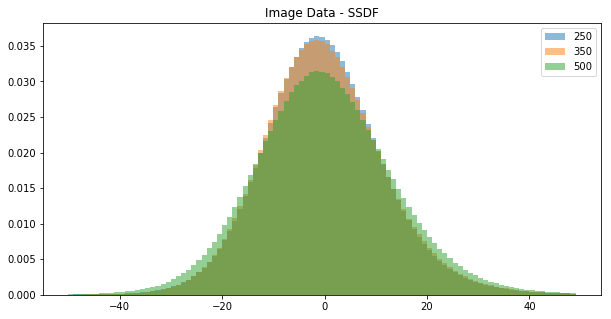

In [93]:
plt.figure(figsize=(10,5));
plt.title('Image Data - SSDF');
norm_hist(SSDF_im250.flatten(), np.arange(-50,50,1), '250');
norm_hist(SSDF_im350.flatten(), np.arange(-50,50,1), '350');
norm_hist(SSDF_im500.flatten(), np.arange(-50,50,1), '500');

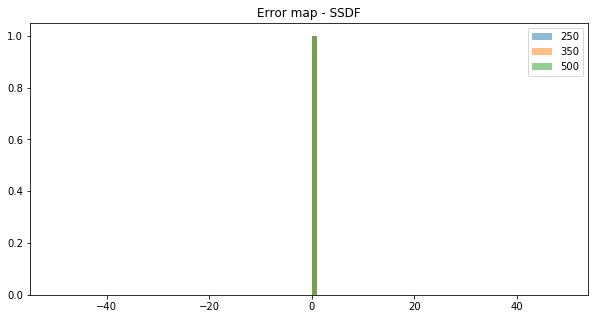

In [40]:
plt.figure(figsize=(10,5));
plt.title('Error map - SSDF');
norm_hist(SSDF_nim250.flatten(), np.arange(-50,50,1), '250');
norm_hist(SSDF_nim350.flatten(), np.arange(-50,50,1), '350');
norm_hist(SSDF_nim500.flatten(), np.arange(-50,50,1), '500');

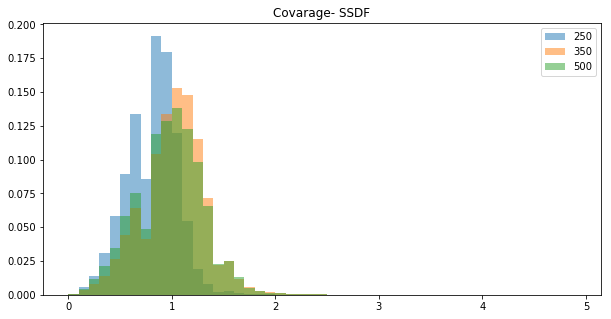

In [95]:
plt.figure(figsize=(10,5))
plt.title('Covarage- SSDF')
norm_hist(SSDF_cov250.flatten(), np.arange(0,5,0.1), '250')
norm_hist(SSDF_cov350.flatten(), np.arange(0,5,0.1), '350')
norm_hist(SSDF_cov500.flatten(), np.arange(0,5,0.1), '500')

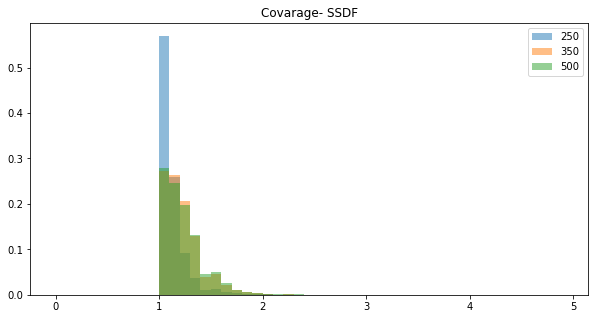

In [41]:
plt.figure(figsize=(10,5))
plt.title('Covarage- SSDF')
norm_hist(SSDF_cov250.flatten(), np.arange(0,5,0.1), '250')
norm_hist(SSDF_cov350.flatten(), np.arange(0,5,0.1), '350')
norm_hist(SSDF_cov500.flatten(), np.arange(0,5,0.1), '500')

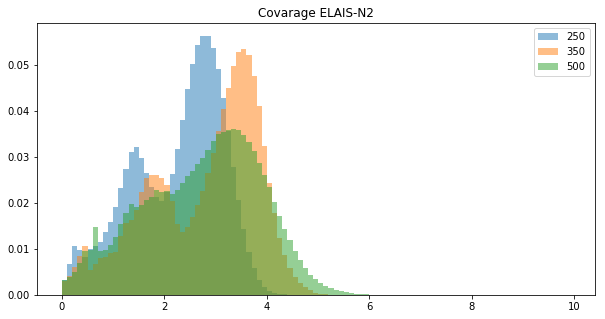

In [96]:
plt.figure(figsize=(10,5))
plt.title('Covarage ELAIS-N2')
norm_hist(EL_cov250.flatten(), np.arange(0,10,0.1), '250')
norm_hist(EL_cov350.flatten(), np.arange(0,10,0.1), '350')
norm_hist(EL_cov500.flatten(), np.arange(0,10,0.1), '500')

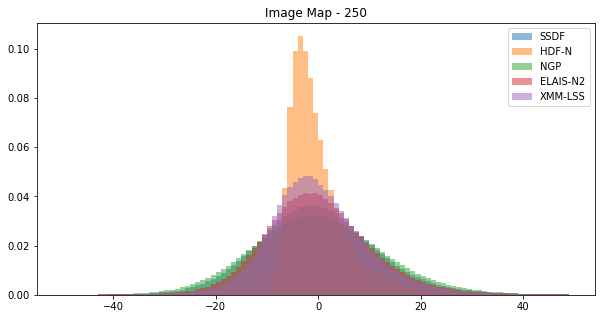

In [98]:
plt.figure(figsize=(10,5));
plt.title('Image Map - 250');
norm_hist(SSDF_im250.flatten(), np.arange(-50,50,1), 'SSDF');
norm_hist(HDFN_im250.flatten(), np.arange(-50,50,1), 'HDF-N');
norm_hist(NGP_im500.flatten(), np.arange(-50,50,1), 'NGP');
norm_hist(EL_im500.flatten(), np.arange(-50,50,1), 'ELAIS-N2');
norm_hist(XMM_im500.flatten(), np.arange(-50,50,1), 'XMM-LSS');

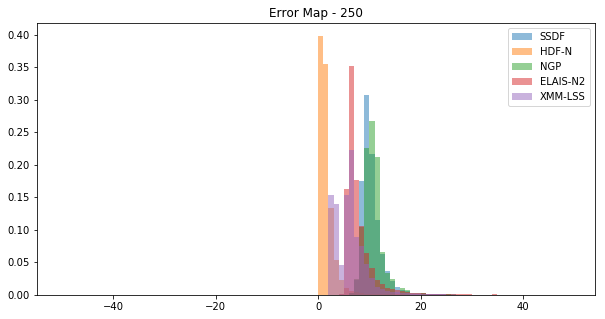

In [102]:
plt.figure(figsize=(10,5));
plt.title('Error Map - 250');
norm_hist(SSDF_nim250.flatten(), np.arange(-50,50,1), 'SSDF');
norm_hist(HDFN_nim250.flatten(), np.arange(-50,50,1), 'HDF-N');
norm_hist(NGP_nim500.flatten(), np.arange(-50,50,1), 'NGP');
norm_hist(EL_nim500.flatten(), np.arange(-50,50,1), 'ELAIS-N2');
norm_hist(XMM_nim500.flatten(), np.arange(-50,50,1), 'XMM-LSS');

In [50]:
x250, y250, slope250, intercept250 = fit_linear(XMM_cov250, XMM_nim250)
x350, y350, slope350, intercept350 = fit_linear(XMM_cov350, XMM_nim350)
x500, y500, slope500, intercept500 = fit_linear(XMM_cov500, XMM_nim500)





In [36]:
print('slopes - SSDF: ', slope250, slope350, slope500, '\n intercepts SSDF: ', intercept250, intercept350, intercept500)

slopes - SSDF:  2.859694914572801 2.973303371543797 3.4017697203087316 
 intercepts SSDF:  6.535539843757305 6.895045238252733 8.144549234515644


In [63]:
print('slopes - HDFN: ', slope250, slope350, slope500, '\n intercepts SSDF: ', intercept250, intercept350, intercept500)

slopes - HDFN:  2.6919361932974604 2.88249702614469 3.4866484215653366 
 intercepts SSDF:  1.563738421608365 1.548082780401283 1.8351247891873532


In [56]:
print('slopes - NGP: ', slope250, slope350, slope500, '\n intercepts NGP: ', intercept250, intercept350, intercept500)

slopes - NGP:  3.3329410259618633 3.430600740336969 4.202481392961445 
 intercepts NGP:  6.541831723785748 6.4949424292106634 6.884776411781394


In [67]:
print('slopes - ELAIS-N2: ', slope250, slope350, slope500, '\n intercepts ELAIS-N2: ', intercept250, intercept350, intercept500)

slopes - ELAIS-N2:  3.3849357496292987 3.6597085188226615 4.631743883741172 
 intercepts ELAIS-N2:  4.83831276641518 4.861632545974416 5.59465463308749


In [51]:
print('slopes - XMM-LSS-SWIRE: ', slope250, slope350, slope500, '\n intercepts XMM-LSS-SWIRE: ', intercept250, intercept350, intercept500)

slopes - XMM-LSS-SWIRE:  8.806520187303057e-05 0.00010260610863359882 0.00013710103946854417 
 intercepts XMM-LSS-SWIRE:  3.4299693197082504e-07 3.304231112916918e-07 4.892927910613018e-07


In [52]:
sg_conf = np.sqrt(intercept250)
sg_conf*1e3

0.5856593992849641

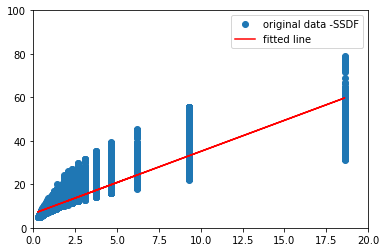

In [26]:
plt.plot(x250[::10], y250[::10], 'o', label='original data -SSDF')
plt.plot(x250[::10], intercept250 + slope*x250[::10], 'r', label='fitted line')
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.legend()
plt.show()

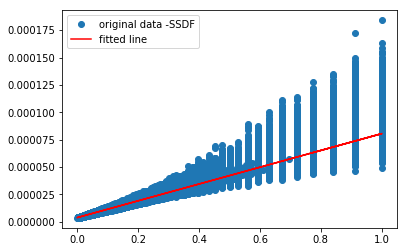

In [43]:
plt.plot(x250, y250, 'o', label='original data -SSDF')
plt.plot(x250, intercept250 + slope250*x250, 'r', label='fitted line')
plt.legend()
plt.show()

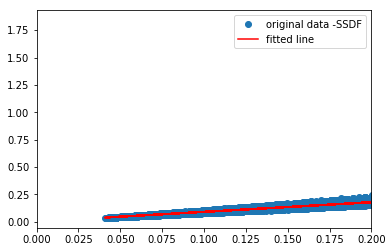

In [53]:
plt.plot(x250, y250*1e4, 'o', label='original data -SSDF')
plt.plot(x250, (intercept250 + slope250*x250)*1e4, 'r', label='fitted line')
plt.xlim(0,0.2)
plt.legend()
plt.show()

In [129]:
x250.max()

inf

In [127]:
x.max()

1.0

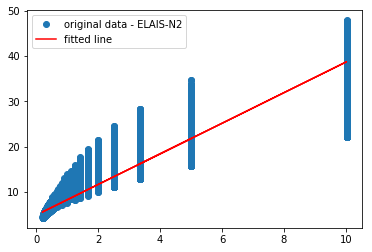

In [149]:
plt.plot(x250, y250, 'o', label='original data - ELAIS-N2')
plt.plot(x250, intercept250 + slope250*x250, 'r', label='fitted line')
plt.legend()
plt.show()

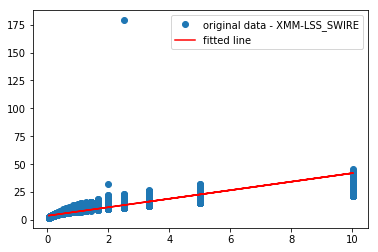

In [112]:
plt.plot(x250, y250, 'o', label='original data - XMM-LSS_SWIRE 250')
plt.plot(x250, intercept250 + slope250*x250, 'r', label='fitted line')
plt.legend()
plt.show()

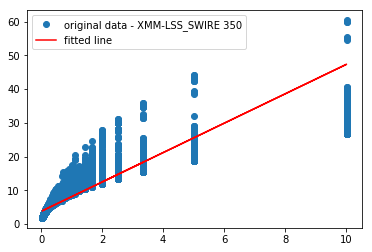

In [114]:
plt.plot(x350, y350, 'o', label='original data - XMM-LSS_SWIRE 350')
plt.plot(x350, intercept350 + slope350*x350, 'r', label='fitted line')
plt.legend()
plt.show()

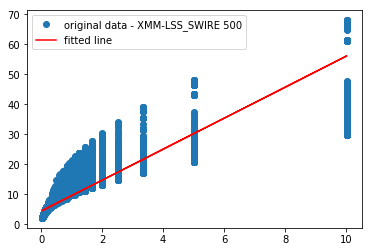

In [113]:
plt.plot(x500, y500, 'o', label='original data - XMM-LSS_SWIRE 500')
plt.plot(x500, intercept500 + slope500*x500, 'r', label='fitted line')
plt.legend()
plt.show()

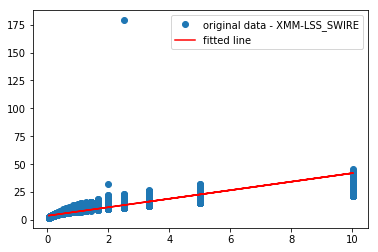

In [112]:
plt.plot(x250, y250, 'o', label='original data - NGP')
plt.plot(x250, intercept250 + slope250*x250, 'r', label='fitted line')
plt.legend()
plt.show()

In [22]:
x = t_inv250.flatten()
y = nim250.flatten()
mask = ~np.isnan(x) & ~np.isnan(y)
#x_norm = normalized(x[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask],y[mask])

In [23]:
slope

0.002859694914572855

In [24]:
intercept

0.006535539843757238

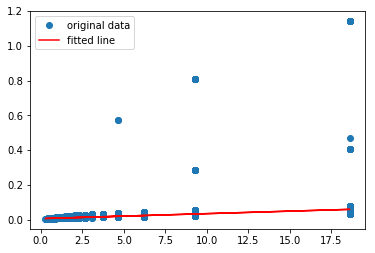

In [26]:
plt.plot(x[mask][::10], y[mask][::10], 'o', label='original data')
plt.plot(x[mask][::10], (intercept + slope*x[mask][::10]), 'r', label='fitted line')
#plt.xlim(0, 1)
#plt.ylim(0, 0.05)
plt.legend()
plt.show()

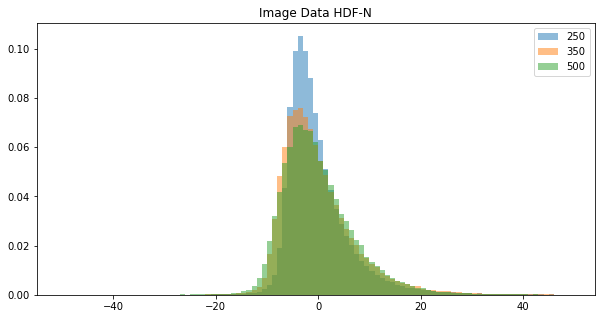

In [42]:
plt.figure(figsize=(10,5))
plt.title('Image Data HDF-N')
norm_hist(im250[mask250].flatten(), np.arange(-50,50,1), '250')
norm_hist(im350[mask350].flatten(), np.arange(-50,50,1), '350')
norm_hist(im500[mask500].flatten(), np.arange(-50,50,1), '500')

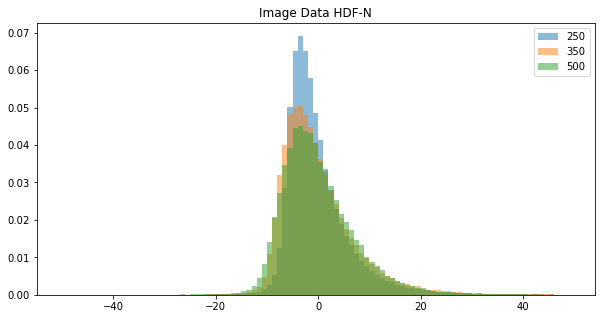

In [24]:
plt.figure(figsize=(10,5))
plt.title('Image Data HDF-N')
norm_hist(im250.flatten(), np.arange(-50,50,1), '250')
norm_hist(im350.flatten(), np.arange(-50,50,1), '350')
norm_hist(im500.flatten(), np.arange(-50,50,1), '500')

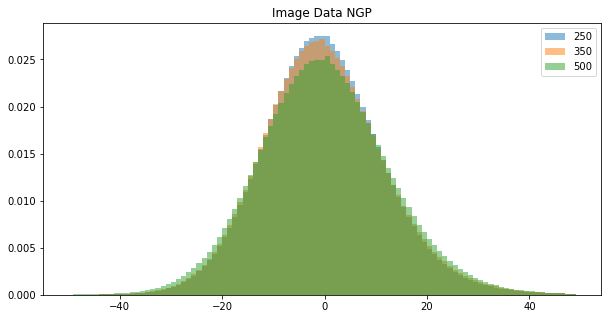

In [21]:
plt.figure(figsize=(10,5))
plt.title('Image Data NGP')
norm_hist(im250.flatten(), np.arange(-50,50,1), '250')
norm_hist(im350.flatten(), np.arange(-50,50,1), '350')
norm_hist(im500.flatten(), np.arange(-50,50,1), '500')

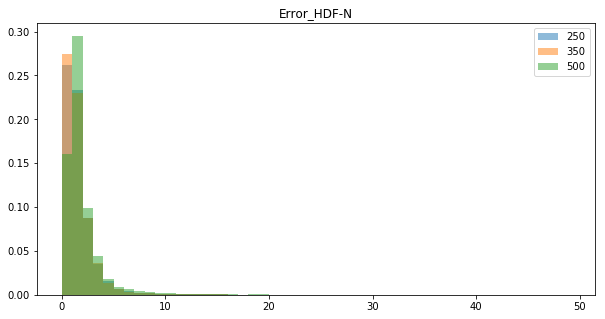

In [25]:
plt.figure(figsize=(10,5))
plt.title('Error_HDF-N')
norm_hist(nim250.flatten(), np.arange(0,50,1), '250')
norm_hist(nim350.flatten(), np.arange(0,50,1), '350')
norm_hist(nim500.flatten(), np.arange(0,50,1), '500')

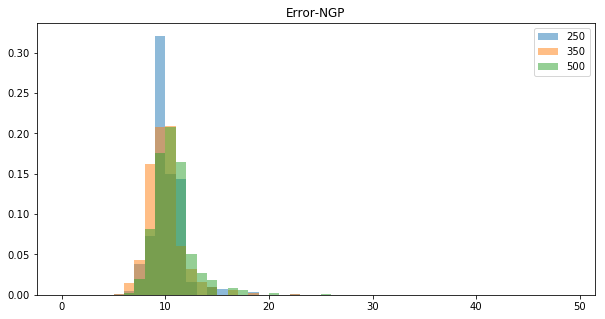

In [20]:
plt.figure(figsize=(10,5))
plt.title('Error-NGP')
norm_hist(nim250.flatten(), np.arange(0,50,1), '250')
norm_hist(nim350.flatten(), np.arange(0,50,1), '350')
norm_hist(nim500.flatten(), np.arange(0,50,1), '500')

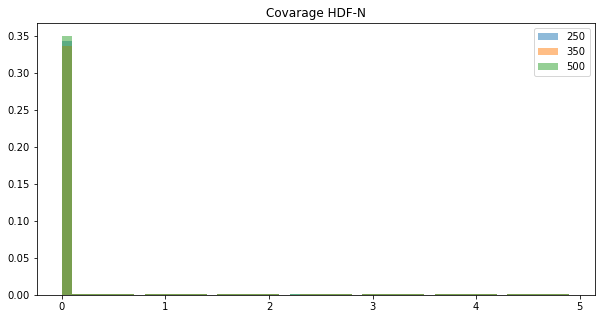

In [26]:
plt.figure(figsize=(10,5))
plt.title('Covarage HDF-N')
norm_hist(cov250.flatten(), np.arange(0,5,0.1), '250')
norm_hist(cov350.flatten(), np.arange(0,5,0.1), '350')
norm_hist(cov500.flatten(), np.arange(0,5,0.1), '500')

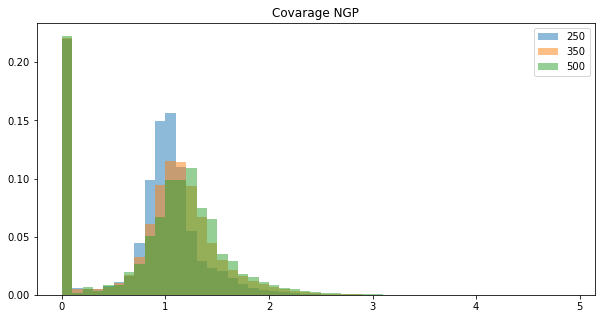

In [22]:
plt.figure(figsize=(10,5))
plt.title('Covarage NGP')
norm_hist(cov250.flatten(), np.arange(0,5,0.1), '250')
norm_hist(cov350.flatten(), np.arange(0,5,0.1), '350')
norm_hist(cov500.flatten(), np.arange(0,5,0.1), '500')

## Comparing maps

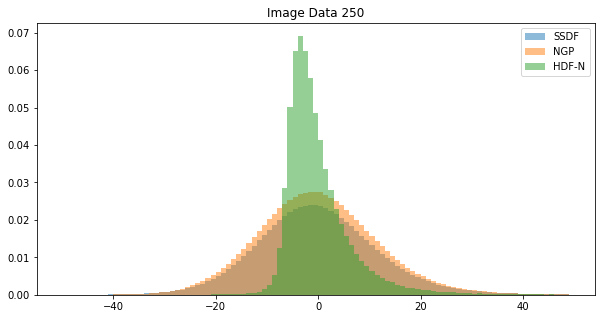

In [14]:
plt.figure(figsize=(10,5))
plt.title('Image Data 250')
norm_hist(im250SSDF.flatten(), np.arange(-50,50,1), 'SSDF')
norm_hist(im250NGP.flatten(), np.arange(-50,50,1), 'NGP')
norm_hist(im250HDF.flatten(), np.arange(-50,50,1), 'HDF-N')

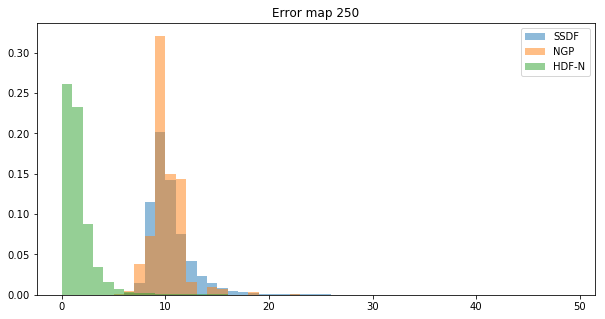

In [22]:
plt.figure(figsize=(10,5))
plt.title('Error map 250')
norm_hist(nim250SSDF.flatten(), np.arange(0,50,1), 'SSDF')
norm_hist(nim250NGP.flatten(), np.arange(0,50,1), 'NGP')
norm_hist(nim250HDF.flatten(), np.arange(0,50,1), 'HDF-N')

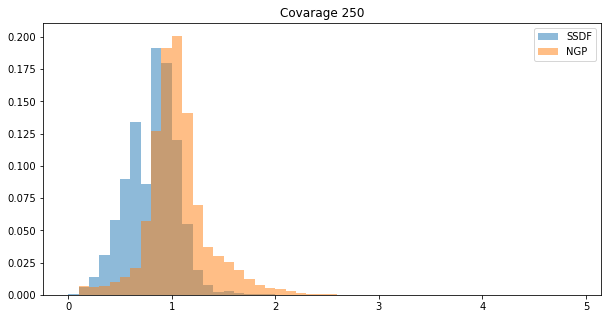

In [97]:
plt.figure(figsize=(10,5))
plt.title('Covarage 250')
norm_hist(cov250SSDF[cov250SSDF != 0].flatten(), np.arange(0,5,0.1), 'SSDF')
norm_hist(cov250NGP[cov250NGP != 0].flatten(), np.arange(0,5,0.1), 'NGP')
#norm_hist(cov250HDF[cov250HDF != 0].flatten(), np.arange(0,5,0.1), 'HDF-N')

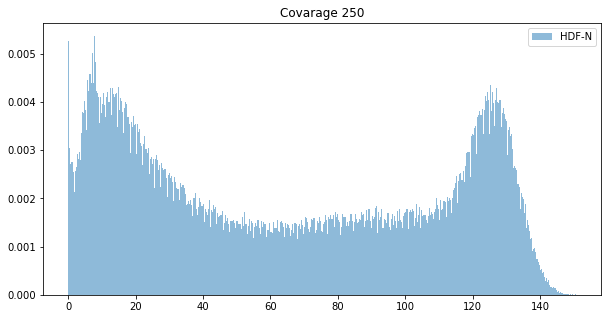

In [98]:
plt.figure(figsize=(10,5))
plt.title('Covarage 250')
#norm_hist_b(cov250SSDF[cov250SSDF != 0].flatten(), 'SSDF')
#norm_hist_b(cov250NGP[cov250NGP != 0].flatten(), 'NGP')
norm_hist_b(cov250HDF[cov250HDF != 0].flatten(), 'HDF-N')

In [17]:
#-----SSDF-------------
hdulist = fits.open(pmwSSDF)
im350SSDF=hdulist[1].data*1.0E3 #convert to mJy
nim350SSDF=hdulist[3].data*1.0E3 #convert to mJy
cov350SSDF = hdulist[4].data # seconds

hdulist.close()

#-----NGP-------------
hdulist = fits.open(pmwNGP)
im350NGP=hdulist[1].data*1.0E3 #convert to mJy
nim350NGP=hdulist[3].data*1.0E3 #convert to mJy
cov350NGP = hdulist[4].data # seconds

hdulist.close()

#-----HDF-N-------------
hdulist = fits.open(pmwHDFN)
im350HDF=hdulist[1].data*1.0E3 #convert to mJy
nim350HDF=hdulist[3].data*1.0E3 #convert to mJy
cov350HDF = hdulist[4].data # seconds

hdulist.close()

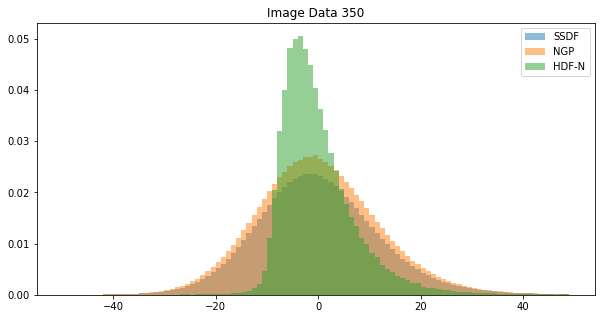

In [18]:
plt.figure(figsize=(10,5))
plt.title('Image Data 350')
norm_hist(im350SSDF.flatten(), np.arange(-50,50,1), 'SSDF')
norm_hist(im350NGP.flatten(), np.arange(-50,50,1), 'NGP')
norm_hist(im350HDF.flatten(), np.arange(-50,50,1), 'HDF-N')

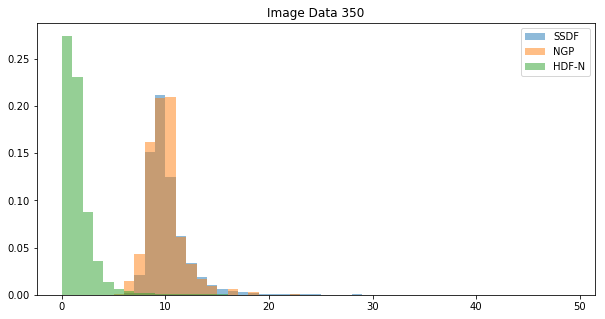

In [25]:
plt.figure(figsize=(10,5))
plt.title('Image Data 350')
norm_hist(nim350SSDF.flatten(), np.arange(0,50,1), 'SSDF')
norm_hist(nim350NGP.flatten(), np.arange(0,50,1), 'NGP')
norm_hist(nim350HDF.flatten(), np.arange(0,50,1), 'HDF-N')

In [19]:
#-----SSDF-------------
hdulist = fits.open(plwSSDF)
im500SSDF=hdulist[1].data*1.0E3 #convert to mJy
nim500SSDF=hdulist[3].data*1.0E3 #convert to mJy
cov500SSDF = hdulist[4].data # seconds

hdulist.close()

#-----NGP-------------
hdulist = fits.open(plwNGP)
im500NGP=hdulist[1].data*1.0E3 #convert to mJy
nim500NGP=hdulist[3].data*1.0E3 #convert to mJy
cov500NGP = hdulist[4].data # seconds

hdulist.close()

#-----HDF-N-------------
hdulist = fits.open(plwHDFN)
im500HDF=hdulist[1].data*1.0E3 #convert to mJy
nim500HDF=hdulist[3].data*1.0E3 #convert to mJy
cov500HDF = hdulist[4].data # seconds

hdulist.close()

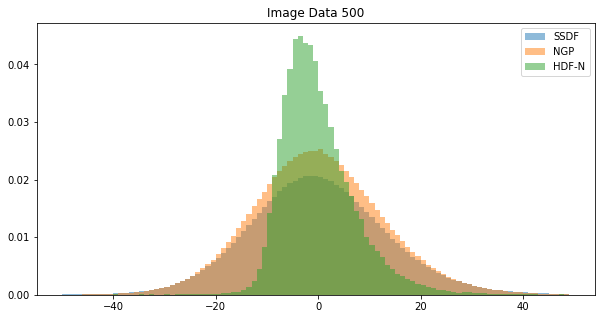

In [20]:
plt.figure(figsize=(10,5))
plt.title('Image Data 500')
norm_hist(im500SSDF.flatten(), np.arange(-50,50,1), 'SSDF')
norm_hist(im500NGP.flatten(), np.arange(-50,50,1), 'NGP')
norm_hist(im500HDF.flatten(), np.arange(-50,50,1), 'HDF-N')

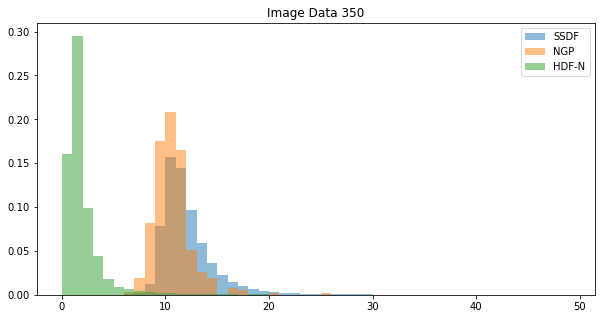

In [26]:
plt.figure(figsize=(10,5))
plt.title('Image Data 350')
norm_hist(nim500SSDF.flatten(), np.arange(0,50,1), 'SSDF')
norm_hist(nim500NGP.flatten(), np.arange(0,50,1), 'NGP')
norm_hist(nim500HDF.flatten(), np.arange(0,50,1), 'HDF-N')